In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.activations import softmax
from sklearn.model_selection import train_test_split

In [3]:
with open("data_banknote_authentication.txt",'r') as f:
  for i in f:
    print(i)
    break

3.6216,8.6661,-2.8073,-0.44699,0



In [4]:
data=pd.read_csv('data_banknote_authentication.txt',header=None)
train_data=np.array(data)[:,:-1]
train_y=np.array(data)[:,-1]
train_x,test_x,train_y,test_y=train_test_split(train_data,train_y,test_size=0.2)

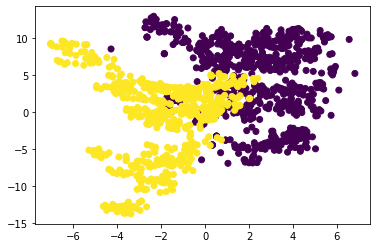

In [164]:
plt.scatter(data[0],data[1],c=data[4])

In [6]:

model=Sequential([
                 Dense(1,input_shape=[4]),
                 Dense(1,activation='sigmoid')

])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])


In [9]:
histoty=model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y))

Epoch 1/10
35/35 [==============================] - 1s 6ms/step - loss: 0.3830 - acc: 0.8241 - val_loss: 0.3515 - val_acc: 0.8473
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3047 - acc: 0.8541 - val_loss: 0.2843 - val_acc: 0.8727
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.2478 - acc: 0.8806 - val_loss: 0.2338 - val_acc: 0.9127
Epoch 4/10
35/35 [==============================] - 0s 2ms/step - loss: 0.2073 - acc: 0.9025 - val_loss: 0.1950 - val_acc: 0.9164
Epoch 5/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1772 - acc: 0.9234 - val_loss: 0.1671 - val_acc: 0.9236
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1554 - acc: 0.9389 - val_loss: 0.1436 - val_acc: 0.9309
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1382 - acc: 0.9444 - val_loss: 0.1256 - val_acc: 0.9491
Epoch 8/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1245 - acc: 0.94

In [141]:
def plot(hist1):
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.plot(hist1['loss'],label='loss')
    plt.title("train_loss vs epochs")
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(hist1['acc'],label='acc')
    plt.plot(hist1['val_acc'],label='val_acc')
    plt.title("acc vs val_acc")
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(hist1['loss'],label='loss')
    plt.plot(hist1['val_loss'],label='val_loss')
    plt.title("val_loss vs val_acc")
    plt.legend()

    
    


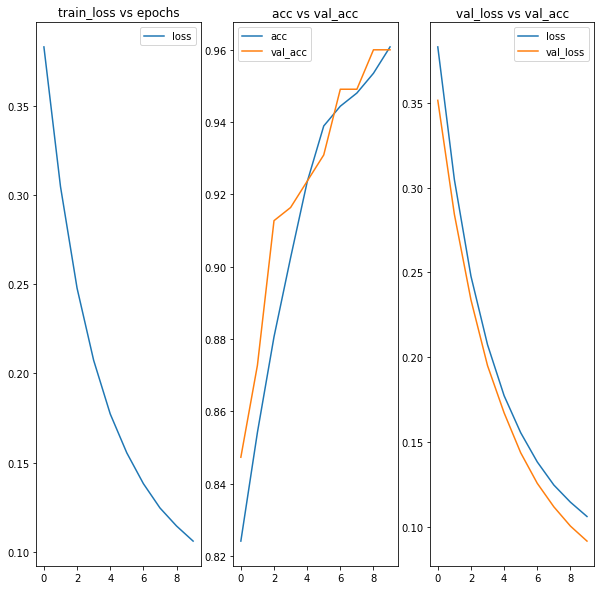

In [142]:
from matplotlib import pyplot as plt
plot(histoty.history)

In [23]:
histoty.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
A technical report containing implementation details (al-
gorithm, initial settings such as sampling the parameters

k0, k1 from some distribution, parameter updates on
epochs, final parameter values at the end of training, train
vs test loss, train and test accuracy, F1-Score, plot of
the loss function vs. epochs, Code base hosted on github
linked in the report)–Maximum 3 pages

##**k0 and K1 vector learned**

In [179]:
model.layers[0].get_weights()

[array([[-0.97720873],
        [-0.64478624],
        [-0.51289546],
        [-0.33570328]], dtype=float32), array([0.23526077], dtype=float32)]

In [114]:
model.layers[0].get_weights()[0]

array([[-0.97720873],
       [-0.64478624],
       [-0.51289546],
       [-0.33570328]], dtype=float32)

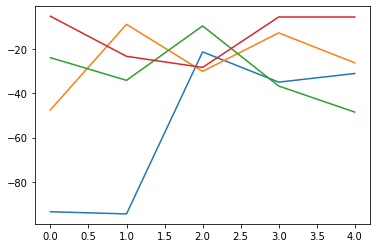

In [181]:
#toy example
value=np.random.randint(10,100,20)
plt.plot(model.layers[0].get_weights()[0].T*value.reshape(5,4)+bias)

##**F1_score**

In [191]:
from sklearn.metrics import f1_score
y_pred=model.predict(test_x)
print(f1_score(test_y.reshape(-1,1),(y_pred>0.5)*1))

0.9547325102880659


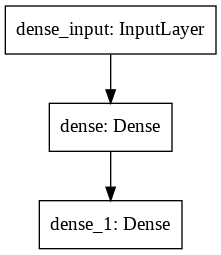

In [194]:
tf.keras.utils.plot_model(model)

In [198]:
bias

array([0.23526077], dtype=float32)